In [1]:
import numpy as np
import matplotlib.pyplot as plt

/Users/Greta/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from pandas import Series
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [3]:
import features_finance as ff
import ETDlearning as ETD
import parameters_finance as pf
import TDlearning as TD
import data_finance

In [4]:
reload(ETD)
reload(ff)

<module 'features_finance' from 'features_finance.pyc'>

##  <center> DATA: IMPORT, NORMALIZATION STANDARDIZATION </center>

In [5]:
dataStock = np.genfromtxt('data_finance.csv', delimiter=",",usecols=(1))

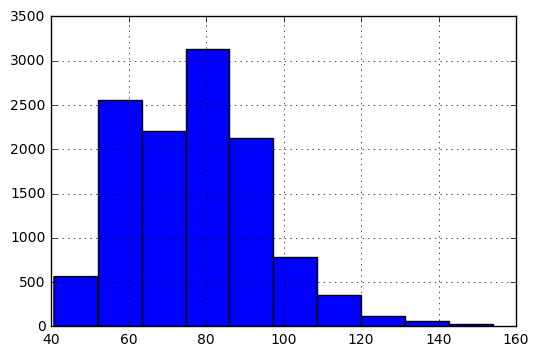

In [6]:
series2 = Series.from_csv('data_finance.csv', header=None)
series2.hist()
plt.show()

In [7]:
# load the dataset and print the first 5 rows
series3 = Series.from_csv('data_finance.csv', header=None)
# prepare data for standardization
values3 = series3.values
values3 = values3.reshape((len(values3), 1))
# train the standardization
scaler3 = StandardScaler()
scaler3 = scaler3.fit(values3)
print('Mean: %f, StandardDeviation: %f' % (scaler3.mean_, sqrt(scaler3.var_)))
# standardization the dataset and print the first 5 rows
normalized3 = scaler3.transform(values3)
# inverse transform and print the first 5 rows
inversed3 = scaler3.inverse_transform(normalized3)

Mean: 77.158716, StandardDeviation: 17.527166


In [8]:
data_array = np.zeros((np.shape(normalized3)[0],1))
for i in range(data_array.shape[0]) : 
    data_array[i,0] = normalized3[i]
data_array = np.flipud(data_array)    
data_array = ff.SMA(data_array,20)
data_array = ff.SMA(data_array,5)

In [9]:
experiments_results = dict()

### <center> EXPERIMENT 1 </center>
* $\gamma(s)$, $\lambda(s)$ and $i(s)$ constant $\forall s$
* BASIC FEATURES (4 PREVIOUS STATES)

In [33]:
reload(ff)
reload(ETD)
reload(pf)

<module 'parameters_finance' from 'parameters_finance.pyc'>

In [34]:
n_p = 7 # NB PREVIOUS STATES
model_features = ff.motherFeatures(data_array,n_p)
fonction_features = model_features.basicFeatures


t_start = 700
t_end = 10000

exp1 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)

In [35]:
interest = 1
coeff_alpha = 1
gamma = 0.9
lda = 0.7
nF = model_features.nbFeatures
finalTable1,observations1,means_episodes1 = exp1.predictWithETD(interest,coeff_alpha,gamma,'constant',lda,nF,fonction_features)
experiments_results['1'] = (finalTable1,observations1,means_episodes1)

### <center> EXPERIMENT 2 </center>
* $\gamma(s)$, and $i(s)$ constant $\forall s$
* 4 previous states
* 20 MA
* 5 MA
* Trend from the 3 previous days
* alpha reduced over time
* lambda varying

In [36]:
reload(ff)
reload(ETD)

<module 'ETDlearning' from 'ETDlearning.pyc'>

In [11]:
t_start = 700
t_end = 10000
n_p = 7 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
sup_class = ff.motherFeatures(data_array,n_p)
model1_feat = ff.model1(sup_class,data_array,h_20,h_5,z)
fonction_features2 = model1_feat.getFeatures
nF = model1_feat.nbFeatures

# learning
interest = 1
coeffAlpha = 1 
gamma = 0.9
lda = 0.3

exp2= ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table2,observations2,means_episodes2 = exp2.predictWithETD(interest,coeffAlpha,gamma,'model 1',lda,nF,fonction_features2)
experiments_results['2'] = (table2,observations2,means_episodes2)

### <center> EXPERIMENT 3 </center>
* basic features
* alpha reduced over time
* lambda increasing for the values closer

In [60]:
n_p = 7 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

model_features = ff.motherFeatures(data_array,n_p)
fonction_features = model_features.basicFeatures
nF = model_features.nbFeatures

fonction1 = pf.model1_lambda

# learning
interest = 1
coeffAlpha = 1
gamma = 0.9
lda = 0.7

exp3 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table3,observations3,means_episodes3 = exp3.predictWithETD(interest,coeffAlpha,gamma,'model 1',lda,nF,fonction_features)
experiments_results['3'] = (table3,observations3,means_episodes3)

In [18]:
import supervisedLearning

In [25]:
reload(supervisedLearning)

<module 'supervisedLearning' from 'supervisedLearning.py'>

In [61]:
exp3bis = supervisedLearning.experimentsSupervisedLearning(t_start,t_end,n_p,data_array)
table3bis,observations3bis,means_episodes3bis= exp3bis.supervisedlearning(coeffAlpha,gamma,nF,fonction_features) 
experiments_results['3bis'] = (table3bis,observations3bis,means_episodes3bis)

In [62]:
exp3bis2 = TD.experimentsTDL(t_start,t_end,n_p,data_array)
table3bis2,observations3bis2,means_episodes3bis2= exp3bis2.predictWithTD_increasingL(0.0001,gamma,0.7,nF,fonction_features)
experiments_results['3bis2'] = (table3bis2,observations3bis2,means_episodes3bis2)

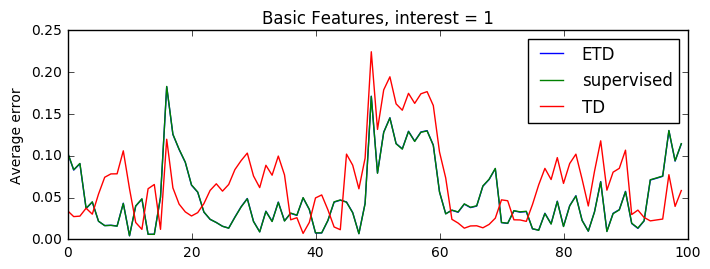

"\nplt.figure(figsize = (8,2.7))\ntable,observations,means_episodes3bis = experiments_results['3bis']\nplt.plot(range(len(means_episodes3bis)),means_episodes3bis)\nplt.ylabel('Average error')\nplt.title('Basic Features Supervised learning')\nplt.show()\n\nplt.figure(figsize = (8,2.7))\ntable,observations,means_episodes3bis2 = experiments_results['3bis2']\nplt.plot(range(len(means_episodes3bis2)),means_episodes3bis2)\nplt.xlabel('Time steps within Episodes')\nplt.ylabel('Average error')\nplt.title('Basic Features TD')\nplt.show()\n\nplt.figure(figsize = (8,2.7))\nplt.plot(range(t_end-t_start),data_array[t_start:t_end,0])\nplt.xlabel('Time')\nplt.ylabel('Open Price')\nplt.title('Original Values normalized')\nplt.plot()\nplt.show()\n\nplt.figure(figsize = (10,4))\nplt.plot(range(t_end-t_start),dataStock[t_start:t_end])\nplt.xlabel('Time')\nplt.ylabel('Open Price')\nplt.title('Original Values')\nplt.plot()\nplt.show()\n"

In [63]:
plt.figure(figsize = (8,2.7))
table,observations,means_episodes3 = experiments_results['3']
table,observations,means_episodes3bis = experiments_results['3bis']
table,observations,means_episodes3bis2 = experiments_results['3bis2']
plt.plot(range(len(means_episodes3[8100:8200])),means_episodes3[8100:8200],label='ETD')
plt.plot(range(len(means_episodes3bis[8100:8200])),means_episodes3bis[8100:8200],label='supervised')
plt.plot(range(len(means_episodes3bis2[8100:8200])),means_episodes3bis2[8100:8200],label='TD')
plt.ylabel('Average error')
plt.title('Basic Features, interest = 1')
plt.legend()
plt.show()

"""
plt.figure(figsize = (8,2.7))
table,observations,means_episodes3bis = experiments_results['3bis']
plt.plot(range(len(means_episodes3bis)),means_episodes3bis)
plt.ylabel('Average error')
plt.title('Basic Features Supervised learning')
plt.show()

plt.figure(figsize = (8,2.7))
table,observations,means_episodes3bis2 = experiments_results['3bis2']
plt.plot(range(len(means_episodes3bis2)),means_episodes3bis2)
plt.xlabel('Time steps within Episodes')
plt.ylabel('Average error')
plt.title('Basic Features TD')
plt.show()

plt.figure(figsize = (8,2.7))
plt.plot(range(t_end-t_start),data_array[t_start:t_end,0])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values normalized')
plt.plot()
plt.show()

plt.figure(figsize = (10,4))
plt.plot(range(t_end-t_start),dataStock[t_start:t_end])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values')
plt.plot()
plt.show()
"""

### <center> EXPERIMENT 4 </center>
* Basic features
* alpha reduced over time
* lambda increasing for the values closer
* random interests

In [68]:
reload(ETD)

<module 'ETDlearning' from 'ETDlearning.py'>

In [69]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

model_features = ff.motherFeatures(data_array,n_p)
fonction_features = model_features.basicFeatures
nF = model_features.nbFeatures

# learning
coeffAlpha = 1
gamma = 0.9
lda = 0.7

exp4 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table4,observations4,means_episodes4 = exp4.predictWithETD_randomI(coeffAlpha,gamma,lda,nF,fonction_features)
experiments_results['4'] = (table4,observations4,means_episodes4)

### <center> EXPERIMENT 5 </center>
* Basic features
* alpha reduced over time
* lambda increasing for the values closer
* interest function relative to bumps

In [65]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

model_features = ff.motherFeatures(data_array,n_p)
fonction_features = model_features.basicFeatures
nF = model_features.nbFeatures

fonction_int1 = pf.model1_interest
# learning
coeffAlpha = 1
gamma = 0.9
lda = 0.7

exp5 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table5,observations5,means_episodes5 = exp5.predictWithETD_interestBumps(fonction_int1,coeffAlpha,gamma,lda,nF,fonction_features)
experiments_results['5'] = (table5,observations5,means_episodes5)

### <center> EXPERIMENT 6 </center>
* TD lambda
* Basic Features
* alpha fixed
* lambda fixed

In [44]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

model_features = ff.motherFeatures(data_array,n_p)
fonction_features = model_features.basicFeatures
nF = model_features.nbFeatures

# learning
gamma = 0.9
lda = 0.7

exp6 = TD.experimentsTDL(t_start,t_end,n_p,data_array)
table6,observations6,means_episodes6 = exp6.predictWithTD(0.0001,gamma,lda,nF,fonction_features)
experiments_results['6'] = (table6,observations6,means_episodes6)

### <center> EXPERIMENT 7 </center>
* TD lambda
* Basic Features
* alpha fixed
* lambda increasing

In [45]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

model_features = ff.motherFeatures(data_array,n_p)
fonction_features = model_features.basicFeatures
nF = model_features.nbFeatures

# learning
gamma = 0.9
lda = 0.7

exp7 = TD.experimentsTDL(t_start,t_end,n_p,data_array)
table7,observations7,means_episodes7 = exp7.predictWithTD_increasingL(0.0001,gamma,lda,nF,fonction_features)
experiments_results['7'] = (table7,observations7,means_episodes7)

### <center> EXPERIMENT 8 </center>
* ETD lambda
* Basic Features + noise
* alpha fixed
* lambda increasing

In [51]:
n_p = 7 # history for open prices
t_start = 700
t_end = 10000

sup_class = ff.motherFeatures(data_array,n_p)
model2_feat = ff.model2(sup_class,data_array,0.0,1.0)
fonction_features3 = model2_feat.getFeatures
nF = model2_feat.nbFeatures

# learning
interest = 1
coeffAlpha = 1
gamma = 0.9
lda = 0.7

exp8 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table8,observations8,means_episodes8 = exp8.predictWithETD(interest,coeff_alpha,gamma,'model 1',lda,nF,fonction_features3)
experiments_results['8'] = (table8,observations8,means_episodes8)

# <center> GRAPHS ALL EXPERIMENTS </center>

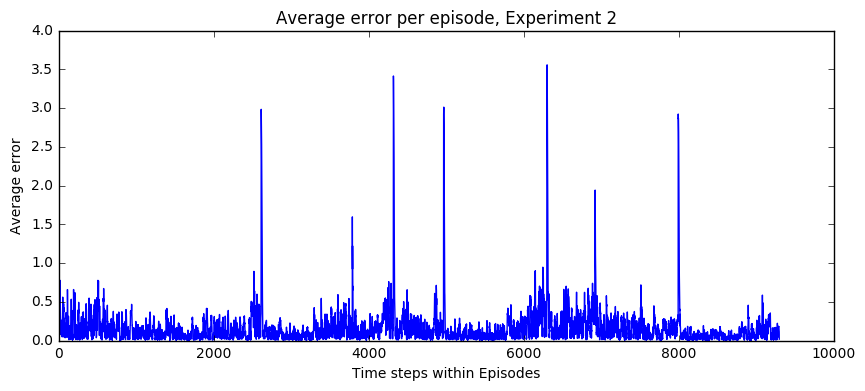

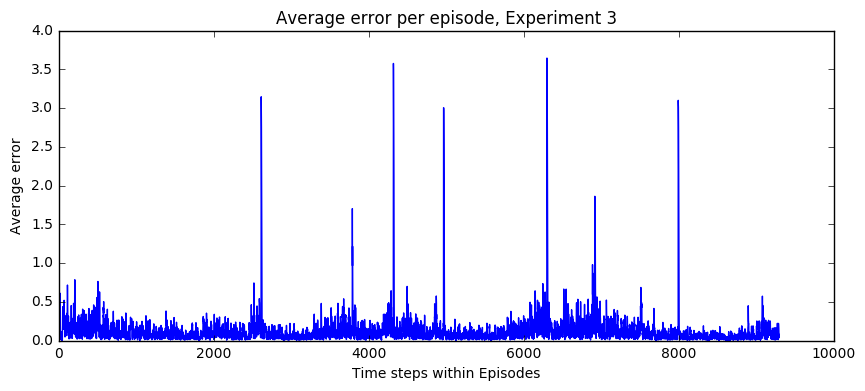

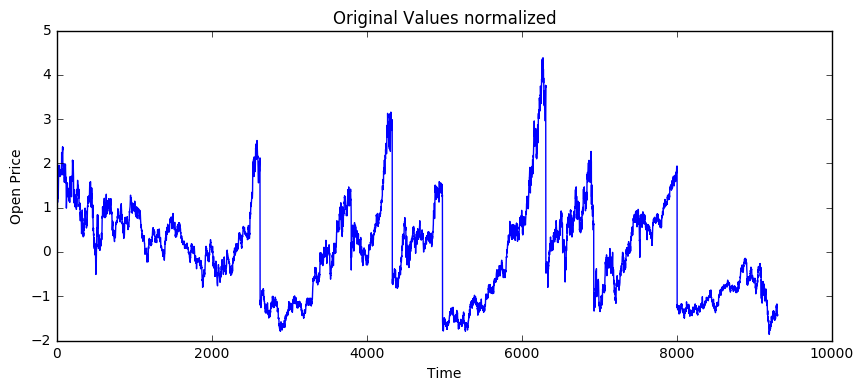

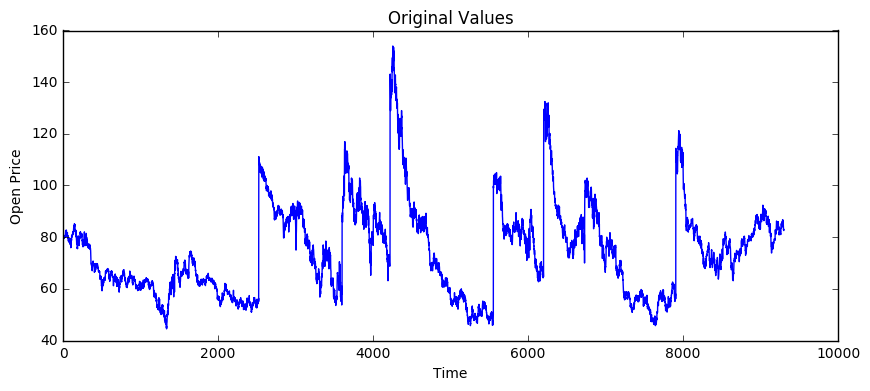

In [14]:
for mn in ['4','3']:#experiments_results.keys() : 
    
    plt.figure(figsize = (10,4))
    table,observations,means_episodes = experiments_results[mn]
    plt.plot(range(len(means_episodes)),means_episodes)
    plt.xlabel('Time steps within Episodes')
    plt.ylabel('Average error')
    plt.title('Average error per episode, Experiment %s'%mn)
    plt.show()

plt.figure(figsize = (10,4))
plt.plot(range(t_end-t_start),data_array[t_start:t_end,0])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values normalized')
plt.plot()
plt.show()

plt.figure(figsize = (10,4))
plt.plot(range(t_end-t_start),dataStock[t_start:t_end])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values')
plt.plot()
plt.show()

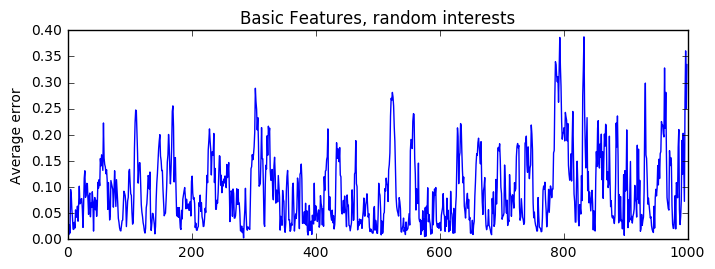

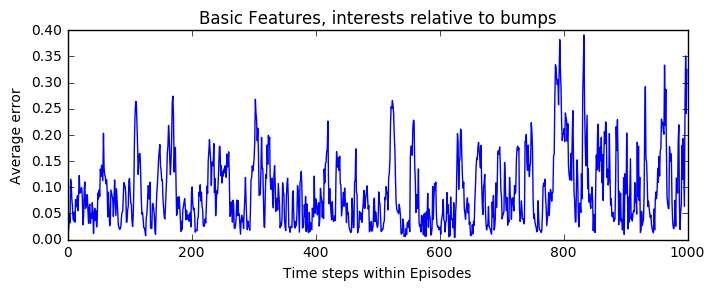

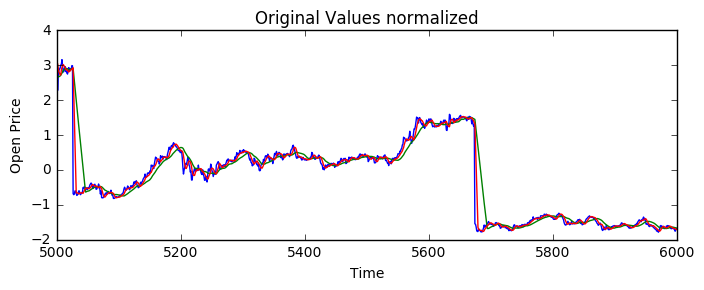

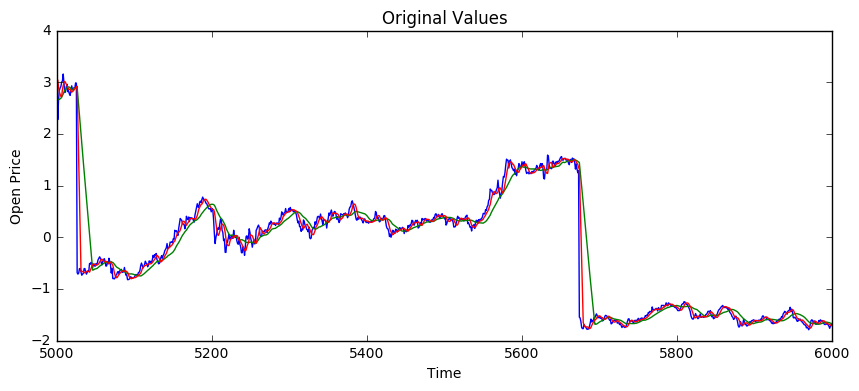

In [70]:
plt.figure(figsize = (8,2.7))
table,observations,means_episodes2 = experiments_results['4']
plt.plot(range(len(means_episodes2[5000:6000])),means_episodes2[5000:6000])
plt.ylabel('Average error')
plt.title('Basic Features, random interests')
plt.show()

plt.figure(figsize = (8,2.7))
table,observations,means_episodes3 = experiments_results['5']
plt.plot(range(len(means_episodes3[5000:6000])),means_episodes3[5000:6000])
plt.xlabel('Time steps within Episodes')
plt.ylabel('Average error')
plt.title('Basic Features, interests relative to bumps')
plt.show()

plt.figure(figsize = (8,2.7))
plt.plot(range(5000,6000),data_array[5000:6000])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values normalized')
plt.plot()
plt.show()

plt.figure(figsize = (10,4))
plt.plot(range(5000,6000),data_array[5000:6000])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values')
plt.plot()
plt.show()